# Setup

In [50]:
(* ResourceFunction["MaTeXInstall"][] *)
<<MaTeX`

In [52]:
cm = 72 / 2.54;
texStyle = {FontFamily -> "Latin Modern Roman", FontSize -> 10};
texTextStyle = {FontFamily -> "Latin Modern Sans", FontSize -> 12};

In [55]:
m1 = N1 M1 / (N1 M1 + N2 * (1 - M2));
m2 = N2 M2 / (N2 M2 + N1 * (1 - M1));
P12s1 = l (1 - q1) ((1 - M1) ((1 - m2) (1 - p1) + m2 p2) + M1 (m1 (1 - p1) + (1 - m1) p2));
P12s2 = l q2 (M2 ((1 - m2) (1 - p1) + m2 p2) + (1 - M2) (m1 (1 - p1) + (1 - m1) p2));
P21s1 = (1 - l) q1 ((1 - M1) ((1 - m2) p1 + m2 (1 - p2)) + M1 (m1 p1 + (1 - m1) (1 - p2)));
P21s2 = (1 - l) (1 - q2) (M2 ((1 - m2) p1 + m2 (1 - p2)) + (1 - M2) (m1 p1 + (1 - m1) (1 - p2)));

In [61]:
p1eq = (1 - p1) P21s1 - p1 P12s1;
p2eq = (1 - p2) P12s2 - p2 P21s2;

In [63]:
eigenGeneric = Eigenvalues[D[{p1eq, p2eq}, {{p1, p2}}]];

# Equal pop and mobility

2
-((-1 + p1) (p1 - 2 M1 (-1 + p1 + p2) + 2 M1  (-1 + p1 + p2)) q1) + 
 
                       2    2
>   l ((1 - 2 M1 + 2 M1 ) p1  + 2 M1 (-1 + M1 + p2 - M1 p2) q1 + 
 
                    2
>      p1 (-1 + 2 M1  (-1 + p2 - q1) + M1 (2 - 2 p2 + 2 q1)))
                             2
-((-1 - 2 M1 (-1 + p1) + 2 M1  (-1 + p1)) p2 (-1 + q2)) + 
 
                                                    2    2
>   2 l (-1 + M1) M1 (-1 + p1) q2 - (1 - 2 M1 + 2 M1 ) p2  (-1 + l + q2) + 
 
                                      2
>   l p2 (1 + 2 M1 (-1 + p1 - q2) + M1  (2 - 2 p1 + 2 q2))
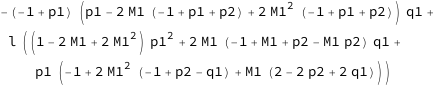
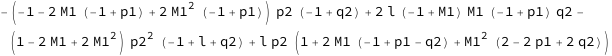

In [64]:
assumptSet = {N2 -> N1,  M2 -> M1};
paramSet = {q2 -> 0.5, q1 -> 0.5, l -> 0.6};
p1eqSimple = Simplify[p1eq /. assumptSet]
p2eqSimple = Simplify[p2eq /. assumptSet]

In [19]:
eigenSimple = Eigenvalues[D[{p1eqSimple, p2eqSimple}, {{p1, p2}}]];

In [20]:
symSols = Assuming[
  M1 < 1 && M1 > 0, 
  Solve[{p1eqSimple == 0, p2eqSimple == 0} /. paramSet, {p1, p2}, NonNegativeReals]
];

Solve::bdomv: Warning: NonNegativeReals is not a valid domain specification. Assuming it is a variable to eliminate.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

In [42]:
genSols = Assuming[
   M1 < 1 && M1 > 0 && q1 < l && q1 > 0 && l < 1 && l > 0  && q2 < 1 && q2 > 0,
   Solve[{p1eqSimple == 0, p2eqSimple == 0} , {p1, p2},  NonNegativeReals]
];

Solve::bdomv: Warning: NonNegativeReals is not a valid domain specification. Assuming it is a variable to eliminate.

In [44]:
genSols /. {l -> 0.6, M1 -> 0.45, q1 -> 0.55, q2 -> 0.5}

{{p1 -> 1., p2 -> 0}, {p1 -> 0, p2 -> 1}, {p1 -> 16.2188, p2 -> 8.96533}, 
 
>   {p1 -> 110.835, p2 -> 103.581}}

In [ ]:
genCoexSol = FullSimplify[genSols[[3]]];

In [30]:
genSols[[3]] /. {q2 -> 0.5, M1 -> 0.2, l -> 0.6, q1 -> 0.55}

{p1 -> 3.30784 - 2.56693 I, p2 -> -0.17451 - 2.56693 I}

In [26]:
(* eigenSimple = FullSimplify[eigenSimple]; *)
genEigenCoex = eigenSimple /. genSols[[3]];

In [ ]:
eigenSimple = FullSimplify[eigenSimple];

: 

: 

## Case of fixed q2 and l

### Stream plots

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Part::partd: Part specification List[[1]] is longer than depth of object.

Part::partd: Part specification List[[2]] is longer than depth of object.

Part::partd: Part specification List[[1]] is longer than depth of object.

General::stop: Further output of Part::partd will be suppressed during this calculation.

-Graphics-
figs/stream_plot_eq_lv=0.5_q2=0.5_q1=0.75_M1=0.2.pdf
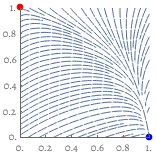

In [976]:
numTol = 10^(-10);
plotParamSet = {q2 -> 0.5, l -> 0.5, q1 -> 0.75, M1 -> 0.2};
  (* Solution limited to Reals and not only po5sitive ones because the \
result will be numericised by
  Mathematica, 
  and there can be a floating point accuracy error making zero \
solutions negative *)
plotSol = Solve[
  {p1eqSimple == 0, p2eqSimple == 0} /. plotParamSet, {p1, p2}, Reals
];
plotEigen = Re[Eigenvalues[D[{p1eqSimple, p2eqSimple} /. plotParamSet, {{p1, p2}}]] /. plotSol];
valuesSol = Normal @ Table[{p1, p2} /. plotSol[[i]], {i, 1, Length[plotSol]}];
validIdx = Flatten[Position[
  valuesSol,
  _?(#[[1]] >= -numTol && #[[2]] >= -numTol && #[[1]] <= 1 + numTol &&  #[[2]] <= 1 + numTol &)
]];
stableIdx = Position[
  plotEigen[[validIdx]], _?(NumericQ[#[[1]]] && NumericQ[#[[2]]] && #[[1]] < 0 &&  #[[2]] < 0 &)
];
  (* Delete cannot take the flattened version because otherwise it \
deletes an element going in higher dimension. 
   If there is either no stable or unstable solution, 
  we need to replace the corresponding empty list by \[EmptySet], 
     because ListPlot can't handle an empty list correctly. *)
plot1 = ListPlot[
  {
    valuesSol[[validIdx]][[Flatten[stableIdx]]], 
    Delete[valuesSol[[validIdx]], stableIdx]
  } /. {} -> {\[EmptySet]},
  PlotStyle -> {Directive[PointSize[0.05], Blue], Directive[PointSize[0.05], Red]}
];
plot2 = StreamPlot[
  {p1eqSimple, p2eqSimple} /. plotParamSet, {p1, 0, 1}, {p2, 0, 1},
  StreamColorFunction -> None
];
plot = Show[
  plot1, 
  plot2,
  AspectRatio -> Automatic,
  FrameTicksStyle -> {texStyle, texStyle},
  Frame -> {{True, False}, {True, False}},
  FrameTicks -> {Range[0, 1, 0.2], Range[0, 1, 0.2]},
  PlotRange -> {{0, 1}, {0, 1}},
  PlotRangeClipping -> False,
  PlotRangePadding -> 0,
  ImageSize -> {5.5 cm, 5.5 cm}
]
paramsStr = (
  "_lv=" <> ToString[l /. plotParamSet] <> "_q2=" <> ToString[q2 /. plotParamSet]
  <> "_q1=" <> ToString[q1 /. plotParamSet] <> "_M1=" <> ToString[M1 /. plotParamSet]
);
fileName = FileNameJoin[{"figs", "stream_plot_eq" <> paramsStr <> ".pdf"}]
Export[fileName, plot]; 

### Stable coexistence coords

In [31]:
paramSetParametricPlot = {q2 -> 0.5, l -> 0.6};
solsForqVals = Table[
    {p1, p2} /. Solve[
        {p1eqSimple == 0, p2eqSimple == 0} /. paramSetParametricPlot /. {q1 -> q1Line}, {p1, p2}, NonNegativeReals
    ][[4]],
    {q1Line, {0.65, 0.675, 0.7, 0.75, 0.9}}
];

Solve::bdomv: Warning: NonNegativeReals is not a valid domain specification. Assuming it is a variable to eliminate.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::bdomv: Warning: NonNegativeReals is not a valid domain specification. Assuming it is a variable to eliminate.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::bdomv: Warning: NonNegativeReals is not a valid domain specification. Assuming it is a variable to eliminate.

General::stop: Further output of Solve::bdomv will be suppressed during this calculation.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.

In [32]:
solsForqVals /. {M1 -> 0.2}

{{-0.0254511, 1.00984}, {0.48406, 0.766412}, {0.7027, 0.608582}, {0.881354, 0.410766}, 
 
>   {0.990901, 0.143842}}

In [ ]:
cmap = "BlueGreenYellow";
parametricPlots = ParametricPlot[
    solsForqVals,
    {M1, 0, 0.5},
    PlotRange -> {0, 1},
    ColorFunction -> (ColorData[cmap][#3 / 0.5] &),
    BaseStyle -> texStyle
];

In [421]:
cmap = "BlueGreenYellow";
plotParamSet = {q2 -> 0.5, l -> 0.6};
parametricPlotForq1Val[q1Line_] := Block[
    {sol, plot},
    sol = Solve[
        {p1eqSimple == 0, p2eqSimple == 0} /. plotParamSet /. {q1 -> q1Line}, {p1, p2}, NonNegativeReals
    ];
    plot = ParametricPlot[
        {p1, p2} /. sol,
        {M1, 0, 0.5},
        PlotRange -> {0, 1},
        ColorFunction -> (ColorData[cmap][#3 / 0.5] &),
        BaseStyle -> texStyle,
        (* ImageSize -> {5.5 cm, 5.5 cm}, *)
        PerformanceGoal -> Quality
    ]
];

{Frame -> {{True, False}, {True, False}}, 
 
>   FrameTicks -> 
 
>    {{{0., 0.2, 0.4, 0.6, 0.8, 1.}, None}, {{0., 0.2, 0.4, 0.6, 0.8, 1.}, None}}, 
 
>   PlotRange -> {{0, 1}, {0, 1}}, PlotRangePadding -> 0, 
 
>   ImageSize -> {155.906, 155.906}}
Column[{-Graphics-, -Graphics-}, Spacings -> 0]
figs/coex_coords_mobility_variation_lv=0.6_q2=0.5.pdf
figs/coex_coords_mobility_variation_lv=0.6_q2=0.5.png
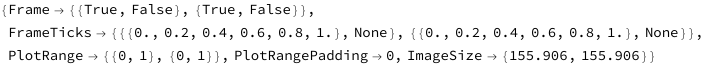
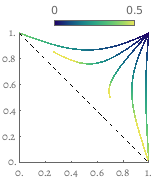

In [147]:
myBarLegend = DensityPlot[
    x, {x, 0, 0.5}, {y, 0, 0.5}, 
    PlotRange -> {{0, 0.5}, {0, 0.5}}, ColorFunction -> (ColorData[cmap][#] &), 
    AspectRatio -> 1/15, FrameTicks -> {{None, None}, {None, {0, 0.5}}},
    ImagePadding -> {{55, 7}, {0, 20}}, ImageSize -> 5 cm
];
options = {
    Frame -> {{True, False}, {True, False}},
    FrameTicks -> {{Range[0, 1, 0.2], None}, {Range[0, 1, 0.2], None}},
    PlotRange -> {{0, 1}, {0, 1}},
    PlotRangePadding -> 0,
    ImageSize -> {5.5 cm, 5.5 cm}
}
diagLine = Plot[1 - p1, {p1, 0, 1}, PlotStyle -> {Black, Dashed, Thickness[0.001]}];
plots = Show[
    parametricPlots, diagLine,
    options
];
final = Column[{myBarLegend, plots}, Spacings -> 0]
paramsStr = (
  "_lv=" <> ToString[l /. paramSetParametricPlot] <> "_q2=" <> ToString[q2 /. paramSetParametricPlot]
);
fileName = FileNameJoin[{"figs", "coex_coords_mobility_variation" <> paramsStr <> ".pdf"}]
Export[fileName, final];
fileName = FileNameJoin[{"figs", "coex_coords_mobility_variation" <> paramsStr <> ".png"}]
Export[fileName, Rasterize[final, ImageResolution -> 300]]; 

### Param space

In [31]:
partParamSet = {q2 -> 0.5};
p1eqPartParam = p1eqSimple /. partParamSet;
p2eqPartParam = p2eqSimple /. partParamSet;
sols = Assuming[
  M1 < 1 && M1 > 0 && q1 < 1 && q1 > 0 && l < 1 && l > 0 && q2 < 1 && q2 > 0,
  Solve[{p1eqPartParam == 0, p2eqPartParam == 0}, {p1, p2}, NonNegativeReals]
];
eigenPartParam = Eigenvalues[D[{p1eqPartParam, p2eqPartParam}, {{p1, p2}}]];

Solve::bdomv: Warning: NonNegativeReals is not a valid domain specification. Assuming it is a variable to eliminate.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Simplify breaks everything!!! https://mathematica.stackexchange.com/questions/66166/simplify-returns-wrong-result

{{p1 -> 0., p2 -> 1.}, {p1 -> 1., p2 -> 0.}, 
 
>   {p1 -> -11.995 - 624.25 I, p2 -> 12.995 - 624.25 I}, 
 
>   {p1 -> -11.995 + 624.25 I, p2 -> 12.995 + 624.25 I}}
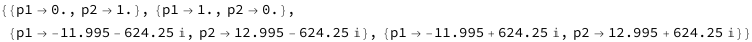

In [41]:
sols /. {M1 -> 0.49, q1 -> 0.51}

In [785]:
eigen1Wins = Re @ Normal @ (eigenPartParam /. sols[[2]]);
eigen2Wins = Re @ Normal @ (eigenPartParam /. sols[[1]]);
coexSol =  sols[[4]];
boolCoex = FirstCase[
  p1 /. coexSol ,
  ConditionalExpression[_, c_] :> c, 
  Missing[],
  {0, -1}
];
eigenCoex = Re @ Normal @ (eigenPartParam /. coexSol);
psCoexSol = {p1 , p2} /. Normal @ coexSol;

Labeling automatically regions only from Mathematica 12 on

-Graphics-
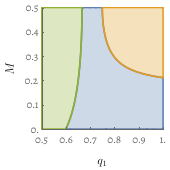

In [791]:
eps = 10^-8;
isStableCoex = AllTrue[eigenCoex, # < 0 &];
isCoexSolPhysical = AllTrue[psCoexSol, # > 0 && # < 1 &];
isStable1 = AllTrue[eigen1Wins, # < 0 &];
isStable2 = AllTrue[eigen2Wins, # < 0 &];
coex2DRegionPlot = RegionPlot[
  {
    isStableCoex && isCoexSolPhysical,
    (* 1 wins: *)
    isStable1,
    (* 2 wins: *)
    isStable2
    (* weird solution, does not appear *)
    (* eigenOther[[1]] < 0 && eigenOther[[2]] < 0
    && xsolOther > 0 && xsolOther < 1  && ysolOther > 0 && ysolOther < 1 *)
  },
  {q1, 0.5, 1}, {M1, 0, 0.5},
  PlotRangePadding -> None,
  FrameTicksStyle -> {texStyle, texStyle},
  FrameTicks -> {Range[0.5, 1, 0.1], Range[0, 0.5, 0.1]},
  FrameLabel -> MaTeX[{"q_1", "M"}, FontSize -> 12],
  AxesLabel -> Automatic, Frame -> {{True, False}, {True, False}},
  ImageSize -> {6*cm, 6*cm}
  (* , MaxRecursion -> 7, PlotPoints -> 10 *)
]

-Graphics-
figs/coex_region_2D_lv=0.6_q2=0.5.pdf
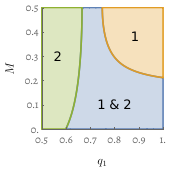

In [797]:
annotCoex2DRegionPlot = Show[
    coex2DRegionPlot,
    {
        Epilog -> {
            (* Text[Style["2", 12], {0.62, 0.25}, {Center, Center}],
            Text[Style["1 & 2", 12], {0.95, 0.25}, {Right, Center}] *)
            (* Text[Style["all speak\nstandard", 12], {0.62, 0.25}, {Center, Center}],
            Text[Style["both forms\ncoexist", 12], {0.95, 0.15}, {Right, Center}] *)

            Text[Style["2", 12, LineSpacing -> {0, 12}], {0.55, 0.3}, {Left, Center}],
            Text[Style["1 & 2", 12], {0.8, 0.1}, {Center, Center}],
            Text[Style["1", 12], {0.9, 0.35}, {Right, Bottom}]
            (* Text[Style["all speak\nstandard", 12], {0.52, 0.3}, {Left, Center}],
            Text[Style["both forms\ncoexist", 12], {0.8, 0.1}, {Center, Center}],
            Text[Style["all speak\nnon-standard", 12], {0.98, 0.35}, {Right, Bottom}] *)
        }
    }
]
paramsStr = "_lv=" <> ToString[l /. partParamSet] <> "_q2=" <> ToString[q2 /. partParamSet];
fileName = FileNameJoin[{"figs", "coex_region_2D" <> paramsStr <> ".pdf"}]
Export[fileName, annotCoex2DRegionPlot];

In [100]:
options = coex2DRegionPlot // Options;

# Fixed q2, free l

In [17]:
genParamSet = {q2 -> 0.5};
p1eqFixedq2 = p1eqSimple /. genParamSet;
p2eqFixedq2 = p2eqSimple /. genParamSet;
genSols = Assuming[
  M1 < 1 && M1 > 0 && q1 < 1 && q1 > 0 && l < 1 && l > 0,
  Solve[{p1eqFixedq2 == 0, p2eqFixedq2 == 0}, {p1, p2}, NonNegativeReals]
];
eigenFixedq2 = Eigenvalues[D[{p1eqFixedq2, p2eqFixedq2}, {{p1, p2}}]];

Solve::bdomv: Warning: NonNegativeReals is not a valid domain specification. Assuming it is a variable to eliminate.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

{{p1 -> 0., p2 -> 1.}, {p1 -> 1., p2 -> 0.}, {p1 -> -237.103, p2 -> -237.299}, 
 
>   {p1 -> 0.699152, p2 -> 0.503112}}
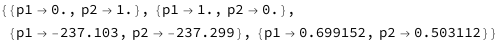

In [84]:
genSols /. {l -> 0.6, M1 -> 0.45, q1 -> 0.7}

In [22]:
genCoexSol =  genSols[[4]];
genEigenCoex = Re @ Normal @ (eigenFixedq2 /. genCoexSol);
psGenCoexSol = {p1, p2} /. Normal @ genCoexSol;

In [ ]:
genEigenCoex = Simplify[genEigenCoex];

Simplify::time: Time spent on a transformation exceeded 300. seconds, and the transformation was aborted. Increasing the value of TimeConstraint option may improve the result of simplification.

In [ ]:
isStableCoex = AllTrue[genEigenCoex, # < 0 &];
isCoexSolPhysical = AllTrue[psGenCoexSol, # > 0 && # < 1 &];
regionPlot = RegionPlot3D[
    isStableCoex && isCoexSolPhysical, 
     (* && genxsolCoex < 1 && genysolCoex < 1, *)
    {l, 0.5, 1}, {q1, 0.5, 1}, {M1, 0, 0.5},
    AxesLabel -> {l, q1, M1},
    (* BaseStyle -> texNumStyle,  *)
    (* BoxStyle -> Opacity[0], 
    PlotStyle -> Directive[GrayLevel[0.62], Specularity[White, 100]], 
    Lighting -> "Neutral" *)
    (* MeshFunctions -> {#1 &, #2 &, #1 &, #1 &}, 
    Mesh -> {10, 10, {0.5}, {0.4}}, 
    MeshStyle -> {Automatic, Automatic, {Thick, myBlue}, {Thick, myOrange}} *)
];

-Graphics3D-
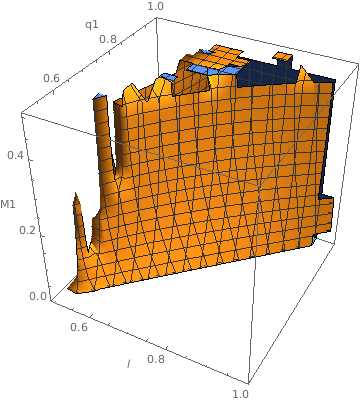

In [33]:
Show[regionPlot, {AxesLabel -> {l, q1, M1}}]

In [37]:
Export[FileNameJoin[{"figs", "coex_region_3D.lwo"}], Show[regionPlot, {AxesLabel -> {l, q1, M1}}]]

figs/coex_region_3D.lwo

In [ ]:
fileName = FileNameJoin[{"figs", "coex_region_3D.png"}]
Export[fileName, Show[regionPlot], "AllowRasterization" -> True, ImageResolution -> 300];

Power::infy:                     1
Infinite expression -- encountered.
                    0.

Infinity::indet: Indeterminate expression 0. ComplexInfinity encountered.

Power::infy:                     1
Infinite expression -- encountered.
                    0.

Infinity::indet: Indeterminate expression 0. ComplexInfinity encountered.

Power::infy:                     1
Infinite expression -- encountered.
                    0.

General::stop: Further output of Power::infy will be suppressed during this calculation.

Infinity::indet: Indeterminate expression 0. ComplexInfinity encountered.

General::stop: Further output of Infinity::indet will be suppressed during this calculation.

https://mathematica.stackexchange.com/questions/48486/high-quality-regionplot3d-for-logical-combinations-of-predicates